In [1]:
%matplotlib inline

# INF-616 - Aula 4: Exemplo SVM 

Professor: Ricardo da Silva Torres -- rtorres@ic.unicamp.br

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  

Monitor: Lucas David -- lucasolivdavid@gmail.com

Este *notebook* faz parte da disciplina INF-616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina.

Instituto de Computação - Unicamp 2019

**Busca de parametros com ``GridSearchCV`` e ``RandomSearchCV``**

*Fonte: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Parameter tuning com `cross_val_score`

In [2]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carrega o dataset

iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# 10-fold cross-validation com C=1.0

svm = SVC(kernel='rbf', C=0.1)
scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
print(scores)

[0.93333333 0.93333333 1.         0.93333333 1.         0.86666667
 0.93333333 0.93333333 1.         1.        ]


/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packa

In [5]:
# acurácia média dos 10-folds

print(scores.mean())

0.9533333333333334


In [6]:
# busca o melhor valor de C

C_range = np.logspace(-2, 10, 8)
C_scores = []
for C in C_range:
    svm = SVC(kernel='rbf', C=C)
    scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
    C_scores.append(scores.mean())
print(C_scores)

/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packa

[0.9333333333333333, 0.9800000000000001, 0.9666666666666668, 0.9199999999999999, 0.9133333333333333, 0.9133333333333333, 0.9133333333333333, 0.9133333333333333]


/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packa

## Parameter tuning com `GridSearchCV` (mais eficiente)

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
# define os valores do parametro 

C_range = np.logspace(-2, 10, 8)
print(C_range)

[1.00000000e-02 5.17947468e-01 2.68269580e+01 1.38949549e+03
 7.19685673e+04 3.72759372e+06 1.93069773e+08 1.00000000e+10]


In [9]:
# cria o grid do parametro

param_grid = dict(C=C_range)
print(param_grid)

{'C': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10])}


In [10]:
# instantiate the grid

grid = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')

- Você pode usar **`n_jobs = -1`** para executar em paralelo (se suportado pelo computador/SO)

In [11]:
grid.fit(X, y)

/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packa

/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rtorres/anaconda3/lib/python3.6/site-packa

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=10000000000.0, cache_size=200, class_weight=None,
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [12]:
grid.cv_results_['mean_test_score']

array([0.93333333, 0.98      , 0.96666667, 0.92      , 0.91333333,
       0.91333333, 0.91333333, 0.91333333])

In [13]:
grid.cv_results_['params']

[{'C': 0.01},
 {'C': 0.517947467923121},
 {'C': 26.826957952797247},
 {'C': 1389.4954943731361},
 {'C': 71968.56730011514},
 {'C': 3727593.720314938},
 {'C': 193069772.88832456},
 {'C': 10000000000.0}]

In [14]:
grid.cv_results_

{'mean_fit_time': array([0.00272396, 0.00185466, 0.00137987, 0.00126026, 0.00143414,
        0.00156662, 0.00249553, 0.00241654]),
 'std_fit_time': array([0.00038618, 0.00048582, 0.00028339, 0.00015299, 0.00016525,
        0.00031463, 0.00039696, 0.00035917]),
 'mean_score_time': array([0.00072668, 0.00072083, 0.0004849 , 0.00037808, 0.00037088,
        0.00044205, 0.00079412, 0.00065551]),
 'std_score_time': array([1.09999442e-04, 1.82260742e-04, 9.12274229e-05, 3.55337758e-05,
        2.47200404e-05, 1.12756132e-04, 2.87446219e-04, 1.16545537e-04]),
 'param_C': masked_array(data=[0.01, 0.517947467923121, 26.826957952797247,
                    1389.4954943731361, 71968.56730011514,
                    3727593.720314938, 193069772.88832456, 10000000000.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.517947467923121},
  {'C': 26.826957952797247},
  {'C': 1389.49549437

In [15]:
# O melhor modelo é

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'C': 0.517947467923121}
SVC(C=0.517947467923121, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


## Usando os melhores parametros no teste (``predict()``)

In [16]:
# train your model using all data and the best known parameters
svm = SVC(C=0.517947467923121)
svm.fit(X, y)

# make a prediction on out-of-sample data
svm.predict([[6.1, 2.4, 1.2, 0.1]])

/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0])

In [17]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[6.1, 2.4, 1.2, 0.1]])

array([0])

## Uma alternativa mais barata: `RandomizedSearchCV`

- `RandomizedSearchCV` busca em um subconjunto dos parametros e você controla o n. de iterações

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
# especifica "parameter distributions" ao invés de "parameter grid"

C_range = np.logspace(-2, 10, 8)
gamma_range = np.logspace(-9, 3, 8)
param_dist = dict(gamma=gamma_range, C=C_range)

In [20]:
# n_iter controla o número de buscas

rand = RandomizedSearchCV(svm, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.cv_results_['mean_test_score']

array([0.91333333, 0.93333333, 0.4       , 0.91333333, 0.4       ,
       0.9       , 0.90666667, 0.90666667, 0.96666667, 0.4       ])

In [21]:
# melhor modelo

print(rand.best_score_)
print(rand.best_params_)

0.9666666666666667
{'gamma': 0.007196856730011514, 'C': 1389.4954943731361}


In [22]:
# executa RandomizedSearchCV 10 vezes

best_scores = []
for _ in range(10):
    rand = RandomizedSearchCV(svm, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.993, 0.973, 0.993, 0.993, 0.967, 0.993, 0.98, 0.973, 0.967, 0.993]


In [23]:
# comparando com GridSearchCV

grid = GridSearchCV(svm, param_dist, cv=10, scoring='accuracy')
grid.fit(X, y)
grid.cv_results_['mean_test_score']

array([0.89333333, 0.90666667, 0.90666667, 0.90666667, 0.90666667,
       0.94      , 0.67333333, 0.4       , 0.89333333, 0.90666667,
       0.90666667, 0.90666667, 0.92666667, 0.98      , 0.81333333,
       0.4       , 0.89333333, 0.90666667, 0.90666667, 0.93333333,
       0.99333333, 0.95333333, 0.9       , 0.4       , 0.89333333,
       0.90666667, 0.93333333, 0.99333333, 0.96666667, 0.91333333,
       0.9       , 0.4       , 0.89333333, 0.93333333, 0.98666667,
       0.96666667, 0.96666667, 0.91333333, 0.9       , 0.4       ,
       0.90666667, 0.97333333, 0.96666667, 0.98      , 0.93333333,
       0.91333333, 0.9       , 0.4       , 0.90666667, 0.98      ,
       0.96666667, 0.96      , 0.93333333, 0.91333333, 0.9       ,
       0.4       , 0.90666667, 0.98      , 0.96      , 0.94666667,
       0.93333333, 0.91333333, 0.9       , 0.4       ])

In [24]:
print(grid.cv_results_['mean_test_score'].mean())
print(rand.cv_results_['mean_test_score'].mean())

0.8577083333333333
0.8159999999999998


## Estratégia 5-2 para validação cruzada e busca de hiperparâmetros

In [25]:
from sklearn.model_selection import cross_validate

grid = GridSearchCV(svm, param_dist, cv=2, scoring='accuracy')
result = cross_validate(grid, X, y,
                            scoring='accuracy',
                            cv=5)
print(result)

{'fit_time': array([0.25028896, 0.22241807, 0.27139521, 0.25122476, 0.4664259 ]), 'score_time': array([0.00044489, 0.00037694, 0.00047684, 0.00115609, 0.00038028]), 'test_score': array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])}


In [26]:
result['test_score']

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

## Extra: Curvas de Validação

In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

In [28]:
digits = load_digits()
X, y = digits.data, digits.target

In [29]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

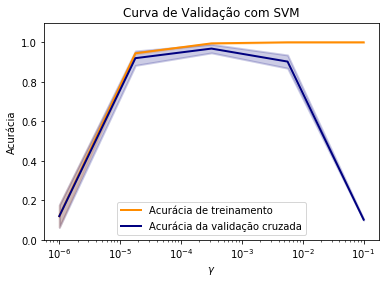

In [29]:
plt.title("Curva de Validação com SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Acurácia")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Acurácia de treinamento",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Acurácia da validação cruzada",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Observações

- O plot mostra diferentes valores para o parâmetro gamma.
- Esquerda: valores baixo para ambos --> underfitting
- Direita: valor baixo apenas para validação, mas alto no treino --> overfitting
- Centro: Melhores valores para gamma